# Ordinaty Least Square Regression

The following example uses the historical [S&P 500 closing prices from Yahoo! Finance][1] to build, fit, and evaluate a linear regression model.

[1]:http://finance.yahoo.com/quote/%5EGSPC

In [40]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from pandas_datareader import data
from datetime import datetime

% matplotlib inline

In [41]:
# Retrieve stock data of S&P 500 (symbol ^GSPC) from Yahoo! Finance.
end = datetime.now()
start = datetime(2009,1,1)

sap = data.DataReader('^GSPC', 'yahoo', start, end) #Get the stock data directly from Yahoo! Finance online

In [42]:
# Create the linea model
olm = lm.LinearRegression()
X = np.array([x.toordinal() for x in sap.index])[:, np.newaxis] # Independent variable (predictors) are the dates
y = sap['Close'] # Dependent variable (predicted value) are the stock close values
olm.fit(X, y) # We train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Predict values
yp = [olm.predict(x.toordinal())[0] for x in sap.index]

In [44]:
# Evaluate the model
olm_score = olm.score(X, y)

In [45]:
olm_score

0.9501393184737853

/home/jarturomora/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


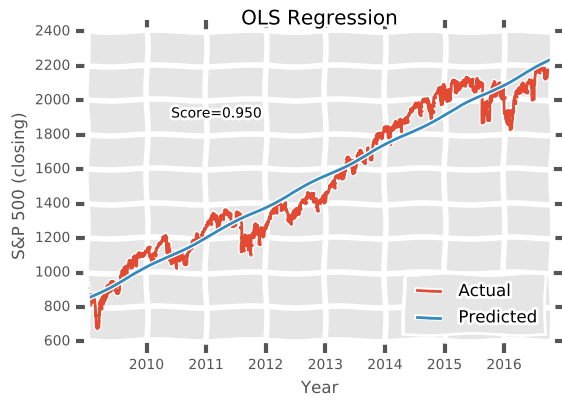

In [46]:
# Plotting the model
matplotlib.style.use('ggplot')
plt.plot(sap.index, y)
plt.plot(sap.index, yp)

# Add plot decorations
plt.title("OLS Regression")
plt.xlabel("Year")
plt.ylabel("S&P 500 (closing)")
plt.legend(['Actual', 'Predicted'], loc = "lower right")
plt.annotate("Score=%.3f" % olm_score, xy = (datetime(2010,6,1), 1900))